In [19]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(SCRIPT_DIR)

import numpy as np
import pickle
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LogNorm
#from tueplots import bundles

from bocpd import bocpd
from hazard import ConstantHazard
from models import DSMGaussian,DSMExponentialGaussian,MultivariateGaussian, DSMMultivariateGaussian
from omega_estimator import OmegaEstimatorGaussian
from utils.find_cp import find_cp
from utils.utils_SWATCH import *
from tueplots import bundles, figsizes

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [4]:
DATA_PATH = os.path.join(SCRIPT_DIR,'data/apple')
RESULT_PATH = os.path.join(SCRIPT_DIR,'notebooks/results/apple')
FILE_PATH = os.path.join(DATA_PATH,'apple.json')

In [2]:
info, data = load_dataset("C:/Users/jsve/Documents/GitHub/DSM-bocd_Test/data/apple/apple.json")

In [16]:
def m(x):
    m = np.eye(2)
    m[0,0] = (1+x[0]**2)**(-1/2)
    m[1,1] = (1+x[1]**2)**(-1/2)
    return m

def grad_m(x):
    m1 = np.zeros((2,2))
    m1[0,0] = -x[0]/((1+x[0]**2)**(3/2))
    m2 = np.zeros((2,2))
    m2[1,1] = -x[1]/((1+x[1]**2)**(3/2))
    return np.concatenate((np.asarray([m1]),np.asarray([m2])),axis=0)

In [18]:
omega = 0.1

mean1_mu0 = 0
var1_mu0 = 1
mean2_mu0 = 0
var2_mu0 = 1

mean1_Sigma0 = 2.5
var1_Sigma0 = 2
mean2_Sigma0 = 5
var2_Sigma0 = 2


mu0 = np.asarray([[mean1_mu0/var1_mu0], [1/var1_mu0],[mean2_mu0/var2_mu0], [1/var2_mu0]])

Sigma0 = np.eye(4)

Sigma0[0,0] = mean1_Sigma0/var1_Sigma0
Sigma0[1,1] = 1/var1_Sigma0
Sigma0[2,2] = mean2_Sigma0/var2_Sigma0
Sigma0[3,3] = 1/var2_Sigma0

print(Sigma0)

[[1.25 0.   0.   0.  ]
 [0.   0.5  0.   0.  ]
 [0.   0.   2.5  0.  ]
 [0.   0.   0.   0.5 ]]


In [20]:
model_DSM = DSMMultivariateGaussian(data, m ,grad_m, omega, mu0, Sigma0, d=2, b = 40)
model_standard = MultivariateGaussian(d=2)

In [21]:
hazard = ConstantHazard(50)

In [22]:
R  = bocpd(data, hazard, model_DSM, verbose = True, K=50)

Processing observation #100
Processing observation #200
Processing observation #300
Processing observation #400
Processing observation #500
Processing observation #600


C:\Users\jsve\AppData\Local\Temp\ipykernel_19316\3117611262.py:34: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0)


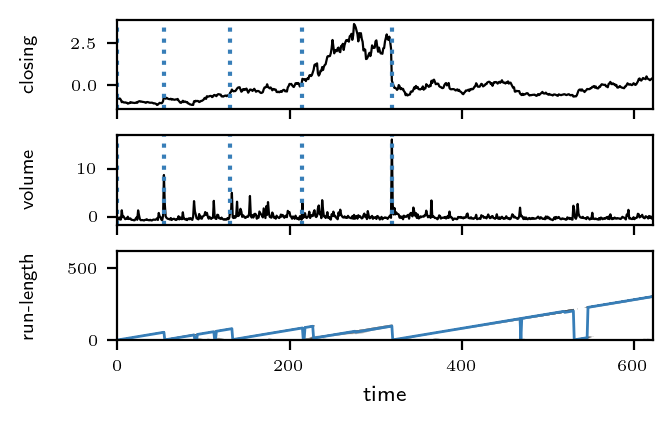

In [23]:
#FILE_NAME = 'Synthetic.pdf'
T = data.shape[0]
cp_color = CB_color_cycle[0]
cps = find_cp(R)
with plt.rc_context(bundles.icml2022()):

    fig, ax = plt.subplots(3, 1, sharex = True, dpi = 200, gridspec_kw={'height_ratios': [1,1,1]})
    ax[0].set_xlim([0, T])
    ax[0].plot(range(0, T),data[:,0],color='black',lw=0.8)

    ax[1].set_xlim([0, T])
    ax[1].plot(range(0, T),data[:,1],color='black',lw=0.8)

    ax[2].set_xlim([0, T])
    ax[2].imshow(np.rot90(R), aspect='auto', cmap='gray_r', 
                   norm=LogNorm(vmin=0.0001, vmax=1), extent=[0,T,0,T])
    ax[2].plot(np.argmax(R,axis=1), c=cp_color,lw=1)

    for cp in cps:
        ax[0].axvline(cp, c=cp_color, ls='dotted', lw=1.5)
        ax[1].axvline(cp, c=cp_color, ls='dotted', lw=1.5)
        
        
    ax[2].set_xlabel('time')
    
    ax[0].set_ylabel('closing' , size= 7)
    ax[1].set_ylabel('volume', size= 7)
    ax[2].set_ylabel('run-length', size= 7)
    
    ax[0].yaxis.set_label_coords(-0.15,0.5)
    ax[1].yaxis.set_label_coords(-0.15,0.5)
    ax[2].yaxis.set_label_coords(-0.15,0.5)
    
    fig.subplots_adjust(hspace=0)
fig
    #fig.savefig(os.path.join(RESULT_PATH, FILE_NAME), format="png", bbox_inches= "tight")

In [25]:
apple_annotation =  {
		"6": [
			319
		],
		"7": [
			319
		],
		"8": [
			319
		],
		"9": [
			53,
			90,
			197,
			276,
			319,
			403,
			463,
			535
		],
		"10": [
			319
		]
	}

In [26]:
f_measure(apple_annotation,cps)

0.7090909090909091